This notebook is to test the inheritance machinery in gemini.
Families are drawn in an image where

#### Affection

+ **green** outline means **unaffected**
+ **red** outline means **affected**

#### Genotype

+ **white** fill means **HOM_REF**
+ **gray** fill means **HET**
+ **black** fill means **HOM_ALT**

In [2]:
import gemini.tests
from gemini.tests.test_inheritance import TestFamily
HOM_REF, HET, UNKNOWN, HOM_ALT = range(4)

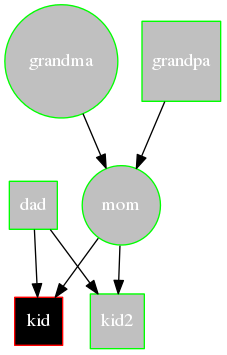

In [4]:
fam = TestFamily("""
 #family_id  sample_id   paternal_id maternal_id sex phenotype
 1   dad   0   0   1  1
 1   mom   grandpa   grandma   2  1
 1   kid   dad   mom   1  2
 1   kid2   dad   mom   1  1
 1   grandma 0   0     2  1
 1   grandpa 0   0     1  1""")
fam.gt_types = [HET, HET, HOM_ALT, HET, HET, HET]
fam.gt_depths = [20, 20, 20, 20, 20, 20]
fam.draw()

# Autosomal Recessive

In [64]:
# kid is autosomal recessive
fam.auto_rec()

True

In [65]:
# if we set anyone else to HOM_ALT, it's no longer auto_rec:

# set grandpa to HOM_ALT
fam.gt_types[5] = HOM_ALT
fam.auto_rec()

False

In [66]:
# but if we dont restrict to affected_only, then:
fam.auto_rec(affected_only=False)

True

In [67]:
# set grandpa back to het
fam.gt_types[5] = HET
# can require a greater read depth (note we set all samples to have depth 20 above)
fam.auto_rec(min_depth=12), fam.auto_rec(min_depth=22)

(True, False)

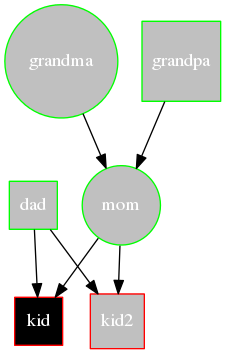

In [68]:
# if we set someone else to affected... The sibling:
fam.subjects[3].affected = True
fam.draw()

In [69]:
fam.auto_rec()

False

In [70]:
# still can't be auto_rec
fam.auto_rec(affected_only=False, strict=False)

False

# Autosomal Dominant

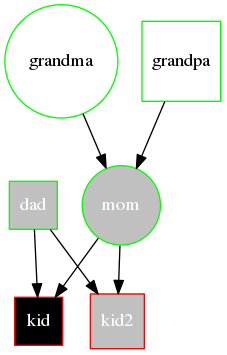

False

In [71]:
fam.gt_types = [HET, HET, HOM_ALT, HET, HOM_REF, HOM_REF]
fam.draw()

# not
fam.auto_dom()


In [72]:
fam.de_novo() # even though mom is a de-novo?

False

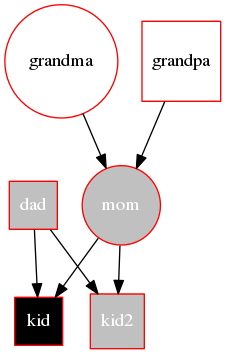

False

In [73]:
for s in fam.subjects: s.affected = True
fam.draw()
fam.auto_dom()

In [74]:
# cant be auto_dom while affected is hom_alt
fam.auto_dom(affected_only=False, strict=False)

False

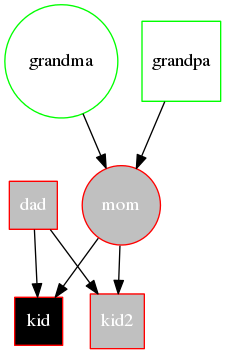

False

In [75]:
fam.subjects[5].affected = fam.subjects[4].affected = False
fam.draw()
# still not auto_dom because affected is homalt
fam.auto_dom()

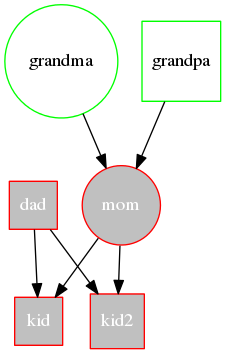

(False, True)

In [76]:
fam.gt_types[2] = HET
fam.draw()

# strict requires that all affected kids have at least 1 affected parent (mom should have affected parent)
fam.auto_dom(), fam.auto_dom(strict=False)

##with unknowns

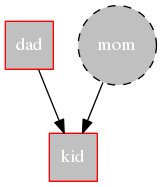

True

In [10]:
fam = TestFamily("""
 #family_id  sample_id   paternal_id maternal_id sex phenotype
 1   dad   0   0   1  2
 1   mom   grandpa   grandma   2  -9
 1   kid   dad   mom   1  2
""")
fam.gt_types = [HET, HET, HET]
fam.gt_depths = [20, 20, 20]
fam.draw()
fam.auto_dom()

# De Novo

In [79]:
# strict means all affected kids must have unaffected parents
fam.de_novo(), fam.de_novo(strict=False), fam.de_novo(affected_only=True)

(False, True, False)